# Neural Network

In this notebook, we will build a neural network from scratch using only low-level functions. We will use the MNIST handwritten digits dataset. The goal of this notebook is purely educational: to understand neural networks and improve my general Python skills. For that reason, I will try to push the code myself and avoid using AI-generated code.

## MNIST library datasets

First, we will import the basic libraries needed for such a project.

In [1]:
import numpy as np
import mnist as mn
import pandas as pd

Lets check what the MNIST library has to offer usdin dir(mnist)

In [2]:
dir(mn)

['IdxDecodeError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'array',
 'datasets_url',
 'download_and_parse_mnist_file',
 'download_file',
 'functools',
 'gzip',
 'numpy',
 'operator',
 'os',
 'parse_idx',
 'struct',
 'tempfile',
 'temporary_dir',
 'test_images',
 'test_labels',
 'train_images',
 'train_labels',
 'urljoin',
 'urlretrieve']

"Dunders" (double underscored "____thing____") are part of Python's data model and they are reserved for system-level behavior. Everything that dir(mn) prints is a given type of Python structure: dictionaries, constants, strings, other modules, classes, exceptions, helpers, methods... And it can be modified but obviously should not.

In [3]:
print(mn.__file__) # file of the module

/home/hugo/ATLAS/ATLAS_VENV/lib/python3.12/site-packages/mnist/__init__.py


In [4]:
print(mn.__name__) # name of the module

mnist


In [5]:
print(type(mn.__builtins__)) # DICTIONARY

<class 'dict'>


In [6]:
print(mn.__version__)

0.2.2


In [7]:
print(mn.datasets_url)

http://yann.lecun.com/exdb/mnist/


Aha! so the dataset should be in that webpage.

In [8]:
mn.test_images??

Signature: mn.test_images()
Source:   
def test_images():
    """Return test images from Yann LeCun MNIST database as a numpy array.
    Download the file, if not already found in the temporary directory of
    the system.

    Returns
    -------
    test_images : numpy.ndarray
        Numpy array with the images in the train MNIST database. The first
        dimension indexes each sample, while the other two index rows and
        columns of the image
    """
    return download_and_parse_mnist_file('t10k-images-idx3-ubyte.gz')
File:      ~/ATLAS/ATLAS_VENV/lib/python3.12/site-packages/mnist/__init__.py
Type:      function

In [9]:
%xmode Minimal
test_images = mn.test_images()

Exception reporting mode: Minimal


HTTPError: HTTP Error 404: Not Found

Okay, so the mnist library is trying to download the mnist dataset from a URL which is no longer valid and so it raises Error 404: Not Found. So... we need to find another way to download the mnist dataset. __The easiest possible solution is to use the datasets from PyTorch library, and so we will try that.__

## PyTorch library datasets

### Finding the dataset. torchvision

We will now import torchvision, the library from torch containing all its datasets and check what's inside it. For that we will use dir() just like before.

In [10]:
import torchvision as tv
dir(tv)

['Module',
 '_HAS_OPS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_image_backend',
 '_internally_replaced_utils',
 '_is_tracing',
 '_meta_registrations',
 '_utils',
 '_video_backend',
 'datasets',
 'disable_beta_transforms_warning',
 'extension',
 'get_image_backend',
 'get_video_backend',
 'io',
 'models',
 'ops',
 'os',
 'set_image_backend',
 'set_video_backend',
 'torch',
 'transforms',
 'utils',
 'version',
 'warnings']

In [31]:
import inspect

src = inspect.getsource(tv.datasets)
print(".\n".join(src.splitlines()[:59]))

from ._optical_flow import FlyingChairs, FlyingThings3D, HD1K, KittiFlow, Sintel.
from ._stereo_matching import (.
    CarlaStereo,.
    CREStereo,.
    ETH3DStereo,.
    FallingThingsStereo,.
    InStereo2k,.
    Kitti2012Stereo,.
    Kitti2015Stereo,.
    Middlebury2014Stereo,.
    SceneFlowStereo,.
    SintelStereo,.
).
from .caltech import Caltech101, Caltech256.
from .celeba import CelebA.
from .cifar import CIFAR10, CIFAR100.
from .cityscapes import Cityscapes.
from .clevr import CLEVRClassification.
from .coco import CocoCaptions, CocoDetection.
from .country211 import Country211.
from .dtd import DTD.
from .eurosat import EuroSAT.
from .fakedata import FakeData.
from .fer2013 import FER2013.
from .fgvc_aircraft import FGVCAircraft.
from .flickr import Flickr30k, Flickr8k.
from .flowers102 import Flowers102.
from .folder import DatasetFolder, ImageFolder.
from .food101 import Food101.
from .gtsrb import GTSRB.
from .hmdb51 import HMDB51.
from .imagenet import ImageNet.
from .ima

Above we have shown ALL the datasets from torchvision.datasets. Every line that goes somthing like: from ... import ...,  contains different datasets and we can actually see all the MNIST datasets already incorporated in this module. 

- **MNIST**: Handwritten digits (0–9)
- **EMNIST**: Extended MNIST (letters + digits)
- **FashionMNIST**: Clothing items from Zalando
- **KMNIST**: Kuzushiji (Japanese characters)
- **QMNIST**: MNIST + extra metadata


Now we have the dataset that we were looking for and so we can start working on it. So, let's check the tv.datasets.MNIST.

In [12]:
tv.datasets.MNIST??

Init signature:
tv.datasets.MNIST(
    root: Union[str, pathlib.Path],
    train: bool = True,
    transform: Optional[Callable] = None,
    target_transform: Optional[Callable] = None,
    download: bool = False,
) -> None
Source:        
class MNIST(VisionDataset):
    """`MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.

    Args:
        root (str or ``pathlib.Path``): Root directory of dataset where ``MNIST/raw/train-images-idx3-ubyte``
            and  ``MNIST/raw/t10k-images-idx3-ubyte`` exist.
        train (bool, optional): If True, creates dataset from ``train-images-idx3-ubyte``,
            otherwise from ``t10k-images-idx3-ubyte``.
        transform (callable, optional): A function/transform that  takes in a PIL image
            and returns a transformed version. E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
        download (bool, optional): If True, downloads

We can actually see the init signature at the top of the upper cell. It tells us how to initialize the mnist dataset, specifically what arguments are we allowed to pass, what's optional and what defaults are used. We will call this initializer to build an instance of the mnist dataset.

In [13]:
import torchvision.transforms as transforms
mnist_data = tv.datasets.MNIST(root = './data_MNIST', train = True, 
                               transform = transforms.ToTensor(), download = True)

100.0%
100.0%
100.0%
100.0%


NOTE: When I started this project, I didn’t realize that setting train=True loads the training dataset and train=False loads the test dataset. As a result, I initially worked only with the training data and later on, I manually split the training dataset into separate training and test sets instead of using the built-in arguments of the MNIST class.

In [14]:
mnist_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data_MNIST
    Split: Train
    StandardTransform
Transform: ToTensor()

In [15]:
type(mnist_data)

torchvision.datasets.mnist.MNIST

So now, mnist_data is an __INSTANCE__ of the MNIST __CLASS__ defined inside torchvision.datasets.mnist module, and so type(mnist_data) simply shows which class that instance belongs to.

That is, we downloaded torchvision and inside it we found a function, torchvision.datasets, where the MNIST dataset was hiding. Inside torchvision.datasets.MNIST we found a defined class MNIST which took some arguments (root, train, transform, download...) to create an instance of the MNIST class and that is exactly what we have done.

### Dynamic Python

It is interesting to understand how Python treats objects. Since Python is __dynamically typed, that is, there is no need to declare types in Python,__ they are determined at runtime and you can do messy stuff like this:

In [16]:
x = 5 # x is an int
print(type(x)) # <class 'int'> 

x = 'hello' # now x is a tring
print(type(x)) # <class 'str'>

<class 'int'>
<class 'str'>


Python dynamically reserves the memory needed to store whatever you pass him at runtime, whereas any other compiled language would need to have explicitly declared anything you pass him and you couldn't just reassing it since it has already allocated just enough memory to store what it was initially.

Let us return to the neural network. We need to use the mnist_data but I don't know how i can extract the data in a useful manner so I will check its defined methods. There are a couple of properties (not methods, they are different): train_labels, test_labels, train_data, test_data which seem useful enough.

In [17]:
mnist_data??

Type:        MNIST
String form:
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data_MNIST
    Split: Train
    StandardTransform
Transform: ToTensor()
Length:      60000
File:        ~/ATLAS/ATLAS_VENV/lib/python3.12/site-packages/torchvision/datasets/mnist.py
Source:     
class MNIST(VisionDataset):
    """`MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.

    Args:
        root (str or ``pathlib.Path``): Root directory of dataset where ``MNIST/raw/train-images-idx3-ubyte``
            and  ``MNIST/raw/t10k-images-idx3-ubyte`` exist.
        train (bool, optional): If True, creates dataset from ``train-images-idx3-ubyte``,
            otherwise from ``t10k-images-idx3-ubyte``.
        transform (callable, optional): A function/transform that  takes in a PIL image
            and returns a transformed version. E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.

In [18]:
labels = mnist_data.targets # calling a property
print(f"Lenght of the targets (labels): {len(labels)}")
print(f"Shape of the targets (labels): {labels.shape}")
print(f"Dimension of the targets (labels): {labels.ndim}")
type(labels)

Lenght of the targets (labels): 60000
Shape of the targets (labels): torch.Size([60000])
Dimension of the targets (labels): 1


torch.Tensor

AHA! We have found the stuff we were looking for. Since the targets of our dataset are just numbers (each image has to correspond to a digit from 0-9) the dimension of the targets is 1, that is, a vector containing numbers from 0-9. And since its length is 60000, we have 60000 different images of handwritten digits varying from 0-9.

In [19]:
data = mnist_data.data
print(f"Lenght of the targets (labels): {len(data)}")
print(f"Shape of the targets (labels): {data.shape}")
print(f"Dimension of the targets (labels): {data.ndim}")
type(data)

Lenght of the targets (labels): 60000
Shape of the targets (labels): torch.Size([60000, 28, 28])
Dimension of the targets (labels): 3


torch.Tensor

So the actual data is composed of 60000 matrices of 28x28 = 784 pixels with different values that represent the intensity of the pixel (1 = white, 0 = black). Each matrix is an image of a digit (0-9) with a label of the correct number it represents. Our objective is to build a neural network capable of predicting that number using only low level functions.

### Visualizing the data

Maybe we should take 1 image (1 matrix) and see what we can do with its 784 pixels input.

In [20]:
import numpy as np # THE library

Let us remember that mnist_data is an instance of torchivision.datasets.MNIST class, it is not a tensor. mnist_data.data IS a torch.tensor that contains the image

In [21]:
print(mnist_data.data[0].shape)

torch.Size([28, 28])


Instead, if we want to see an image of a digit, we need to check mnist_data element by element. I know that i need to sort images, so I want to see them to better know the dataset.

In [22]:
first_image, first_label = mnist_data[0]

In [23]:
print(type(first_image))
print(first_image.shape)

<class 'torch.Tensor'>
torch.Size([1, 28, 28])


In [26]:
print(first_label)
print(type(first_label))

5
<class 'int'>


After all the effort, we finally have the images stored in a useful variable type. This is important because it allows us to stay organized before diving into the complex mathematics of neural networks, ensuring our data is handled easily.

The first label is a 5 and so we should see a 5 if if we printed the first image.

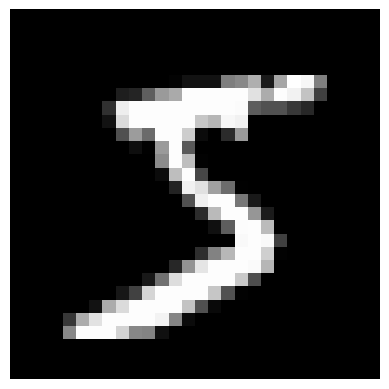

In [27]:
import matplotlib.pyplot as plt
plt.imshow(first_image.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

Now that seems like a 5 to me!

In [28]:
data.shape

torch.Size([60000, 28, 28])

In [29]:
labels.shape

torch.Size([60000])

In [30]:
data[0].shape

torch.Size([28, 28])

In [31]:
data[0].flatten().shape

torch.Size([784])

We now need to start building the neural network. We have 60000 handwritten digits to pass to our neural network but we will focus now on trying to do something with just the first handwritten digit since I don't even know how to forward just one image.

In [32]:
first_image, first_label = mnist_data[0]
X = first_image.squeeze(0).reshape(784,1)
X.shape

torch.Size([784, 1])

## Neural network methods

### Forwarding

To classify each 28×28 image, we need a set of weight matrices and activation functions that transform the 784 input pixels into 10 output values—one for each possible digit (0–9). Throughout the network we can use the activation function tanh(x), but it is not suitable for the final layer. The reason is that tanh(x) produces arbitrary real numbers in [-1,1] which cannot be interpreted as probabilities.

For the output layer, we instead use the __softmax function__. Softmax function is a mathematical function that converts a vector of raw prediction scores (often called logits) from the neural network into probabilities. These probabilities are distributed across different classes such that their sum equals 1. Essentially, Softmax helps in transforming output values into a format that can be interpreted as probabilities, which makes it suitable for classification tasks.

In a multi-class classification neural network, the final layer outputs a set of values, each corresponding to a different class. These values, before Softmax is applied, can be any real numbers, and may not provide meaningful information directly. The Softmax function processes these values into probabilities, which indicate the likelihood of each class being the correct one.

In [33]:
import torch

def softmax(array):
    exponentials = torch.exp(array)
    return exponentials / exponentials.sum()

W1 = torch.randn(64,784)
b1 = torch.tensor(np.random.randn(64,1), dtype=torch.float32)
Z1 = W1 @ X + b1
A1 = torch.tanh(Z1)

W2 = torch.randn(10,64)
b2 = torch.tensor(np.random.randn(10,1), dtype=torch.float32)
Z2 = W2 @ A1 + b2
Q = softmax(Z2)

print(Q)
print("\nComprobación de la normalización: %.5f\n " %Q.sum())

tensor([[7.1371e-04],
        [4.6327e-01],
        [6.3025e-08],
        [2.1578e-02],
        [5.2047e-05],
        [1.0602e-04],
        [1.8146e-01],
        [3.3253e-01],
        [4.3314e-06],
        [2.9291e-04]])

Comprobación de la normalización: 1.00000
 


Great — we’ve now passed an input through our model and obtained an output. It’s a small step, and our “network” is still extremely simple, but it’s a real milestone: __we can actually compute__.

### Cross-Entropy and Shannon information

The next step is to introduce a loss function so we can begin the backpropagation process. For classification problems, it’s standard to use the cross-entropy loss, so that’s what we’ll implement.

Cross-entropy measures how well the predicted probability distribution matches the true distribution. In a classification task, the true distribution is typically a one-hot vector: the correct class has probability 1, and all others have probability 0. Cross-entropy penalizes the model based on how much probability it assigns to the correct class.

__If the model assigns high probability to the correct label, the loss is low.__

__If the model assigns low probability to the correct label, the loss increases rapidly.__

This makes cross-entropy particularly effective for training classifiers, because it directly encourages the model to place as much probability mass as possible on the correct answer.

In [34]:
import numpy as np

Below we show the expression of the __Shannon information__ carried by an event X with a probability Px. 

Shannon information and Shannon entropy are among the most well-known concepts in information theory because they generalize remarkably well across many fields. Their adaptability has made them widely used—notably in physics, where they often appear in statistical mechanics and thermodynamics.

In [35]:
dir(np)# i dont know ho to call the log_{2} 

['False_',
 'ScalarType',
 'True_',
 '_CopyMode',
 '_NoValue',
 '__NUMPY_SETUP__',
 '__all__',
 '__array_api_version__',
 '__array_namespace_info__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__dir__',
 '__doc__',
 '__expired_attributes__',
 '__file__',
 '__former_attrs__',
 '__future_scalars__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__numpy_submodules__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_array_api_info',
 '_core',
 '_distributor_init',
 '_expired_attrs_2_0',
 '_globals',
 '_int_extended_msg',
 '_mat',
 '_msg',
 '_pyinstaller_hooks_dir',
 '_pytesttester',
 '_specific_msg',
 '_type_info',
 '_typing',
 '_utils',
 'abs',
 'absolute',
 'acos',
 'acosh',
 'add',
 'all',
 'allclose',
 'amax',
 'amin',
 'angle',
 'any',
 'append',
 'apply_along_axis',
 'apply_over_axes',
 'arange',
 'arccos',
 'arccosh',
 'arcsin',
 'arcsinh',
 'arctan',
 'arctan2',
 'arctanh',
 'argmax',
 'argmin',
 'argpartition',
 'argsort',
 'argwhere',
 'around',
 'array',
 'arr

In [36]:
info_x= lambda Px: -np.log2(Px) # information given in bits

In [37]:
info_x(0.5) # a binary state needs two bits of information to be described

np.float64(1.0)

In [38]:
p = np.random.rand(10)
p = p / p.sum() # distribución de probabilidad normalizada
print(f"Distribución de probabilidad de 10 posibles estados: \n{p}")
print("SUMA de p: %.2f" %p.sum())

Distribución de probabilidad de 10 posibles estados: 
[0.11475138 0.05865726 0.09952761 0.1506463  0.12908598 0.03589757
 0.1396831  0.00383445 0.11826196 0.14965437]
SUMA de p: 1.00


In [39]:
info_x(p)

array([3.12341653, 4.09154644, 3.32875932, 2.73076285, 2.95359574,
       4.79996982, 2.83977061, 8.02676506, 3.07994205, 2.74029365])

States that have less probability carry the highest Shannon information whereas the more probable ones contain the lowest Shannon information. We can see that by plotting the info_x function.

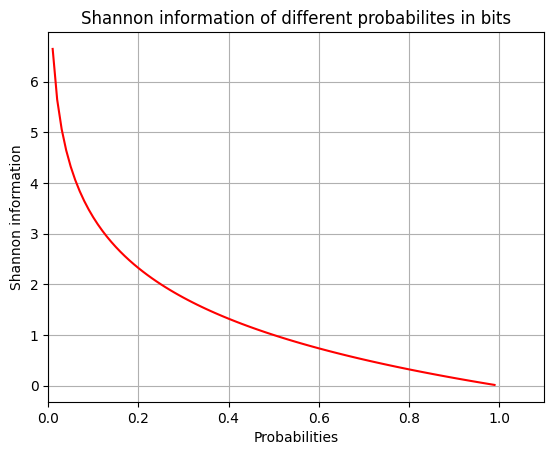

In [40]:
import matplotlib.pyplot as plt

x = np.arange(0.01,1,0.01)
info_X = info_x(x)
plt.plot(x, info_X, 'r-')
plt.title("Shannon information of different probabilites in bits")
plt.xlabel("Probabilities")
plt.ylabel("Shannon information")
plt.xlim(0,1.1)
plt.grid()

Each probability carries some information, and those that are the less probable carry the most information. If an event is sure to happen (probability = 1), its information carried is null because, well, we already knew it was gonna happen and so it does not reveal anything surprising or unkown. 

In [41]:
entropy_p = (-np.array([np.log2(p[i]) for i in range(len(p))])).sum()
print(entropy_p)

37.7148220764285


Given our previous distribution p, its entropy, that is, its disorder, is an average of the information of the distribution. That is, the entropy is the value we would obtain if we take the average of randomly selected states information. 

Cross-Entropy estimates the number of bits required to represent or transmit an average event from one distribution to another distribution.

In [42]:
def H(P,Q):
    return - np.array(([P[i]*np.log(Q[i]) for i in range(len(P))])).sum()
    
p = np.random.rand(10)
p = p / p.sum()

q = np.random.rand(10)
q = q / q.sum()

print("\nCross-Entropy H(p,q) = %.2f nats\n" %H(p,q))
print("\nCross-Entropy H(q,p) = %.2f nats\n" %H(q,p))


Cross-Entropy H(p,q) = 2.50 nats


Cross-Entropy H(q,p) = 2.33 nats



In a classification problem, cross-entropy is especially useful as a loss function because each sample must be assigned to one of several classes. This means the target distribution for any given sample is “1” for its true class and “0” for all others, making cross-entropy a natural fit for measuring how well the model’s predicted distribution matches the target.

The entropy of the target distribution is null since it is perfectly organized (one class True the rest False) and so if our approximation of the target distribution doesn't perfectly fit it, the Cross-Entropy will be greater than 0. 

In [43]:
# 5 classes in total
target_distribution = [1, 0, 0, 0, 0] # our sample belongs to the zeroth class

predicted_distribution = [0.9, 0.05, 0.03, 0.02, 0.01] # our classification of the sample

print("Cross-Entropy: %.5f nats" %H(target_distribution, predicted_distribution))

Cross-Entropy: 0.10536 nats


Generally, in a classification problem, the loss function is the __average Cross-Entropy__, taht is, we average the Cross_Entropy across all examples in the dataset.

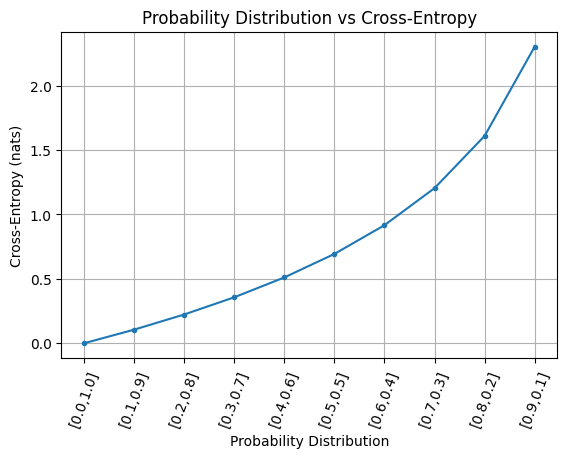

In [44]:
target_distribution = [0, 1]
probs = [1.0 - 1e-10, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

distributions = [[1-p, p] for p in probs] # We predict 10 different distributions

cross_entropies = [H(target_distribution, d) for d in distributions]

plt.plot([1-p for p in probs], cross_entropies, marker = '.')
# 1-p is just [0 ,0.1 ,0.2 ,0.3 ,0.4 ,0.5 ,0.6 ,0.7 ,0.8 ,0.9 ,1] its just a label
# for each distribution to represent its cross-entropy accordingly in the graph

plt.title('Probability Distribution vs Cross-Entropy')
plt.xticks([1-p for p in probs], ['[%.1f,%.1f]'%(d[0],d[1]) for d in distributions], rotation=70)
plt.subplots_adjust(bottom=0.2)
plt.xlabel('Probability Distribution')
plt.ylabel('Cross-Entropy (nats)')
plt.grid()
plt.show()

When the cross-entropy rises above about 0.5 nats, the model’s performance becomes noticeably poor. The “sweet spot” is typically somewhere between __0.2 and 0.3 nats__, improvements in this range are harder to achieve, but they reflect meaningful gains in model quality. In the ideal case, when the predicted distribution matches the target distribution exactly, the model classifies every sample perfectly and the cross-entropy drops to zero.

With this intuition in place, we can now formally define cross-entropy as our loss function. For the moment, we’ll restrict our attention to just the first handwritten digit in the MNIST dataset. 

In [45]:
def H_nats(P,Q):
    return - np.array([P[i]*np.log(Q[i]) for i in range(len(P))]).sum() 

In [46]:
np.log(np.exp(1))

np.float64(1.0)

In [47]:
print(f"\nQ: {Q}\n") # output of the neural network
print("first_label: %i"%first_label)


Q: tensor([[7.1371e-04],
        [4.6327e-01],
        [6.3025e-08],
        [2.1578e-02],
        [5.2047e-05],
        [1.0602e-04],
        [1.8146e-01],
        [3.3253e-01],
        [4.3314e-06],
        [2.9291e-04]])

first_label: 5


In [48]:
print("\nCross-Entropy loss function value: %.6f nats\n" % -torch.log(Q.flatten()[5]))


Cross-Entropy loss function value: 9.151917 nats



#### Ideally, we want the cross-entropy to be around 0.2–0.3 nats in a classification problem. Values above 0.3 nats indicate that the model’s predictions are somewhat poor.

### Backpropagation

Now we have everything we need to begin the backpropagation process. We have our activation functions and our loss function, and we know how to compute their derivatives with respect to the weights of each layer. Using these derivatives, we can update the weight matrices in a way that gradually improves the model’s accuracy.

We will now calculate the backward process for the output layer:

In [49]:
lr = 1e-2

In [50]:
delta2 = (Q - torch.tensor([[0],[0],[0],[0],[0],[1],[0],[0],[0],[0]]))

grad_loss_w2 = delta2 @ A1.T
grad_loss_b2 = delta2 

W2 = W2 - lr*(grad_loss_w2)
b2 = b2 - lr*(grad_loss_b2)

Now for the hidden layer:

In [51]:
delta1 = (W2.T @ delta2) * (1 / torch.cosh(Z1)**2)

grad_loss_w1 = delta1 @ X.T
grad_loss_b1 = delta1

W1 = W1 - lr*(grad_loss_w1)
b1 = b1 - lr*(grad_loss_b1)

In [52]:
Z1 = W1 @ X + b1
A1 = torch.tanh(Z1)

Z2 = W2 @ A1 + b2
Q = softmax(Z2)

print(Q)
print("\nComprobación de la normalización: %.5f\n " %Q.sum())

tensor([[2.7863e-03],
        [8.4080e-02],
        [1.1899e-07],
        [6.1976e-02],
        [1.8032e-04],
        [1.9649e-03],
        [2.8984e-01],
        [5.5799e-01],
        [7.0398e-05],
        [1.1117e-03]])

Comprobación de la normalización: 1.00000
 


In [53]:
print("\nCross-Entropy loss function value: %.6f nats\n" % -torch.log(Q.flatten()[5]))


Cross-Entropy loss function value: 6.232331 nats



The cross-entropy has decreased! To summarize: we first took an image and stored each pixel value in a (784,1) array. We then passed it through a randomly initialized neural network, which initially produced a cross-entropy. Next, we derived the equations for the backpropagation process and applied gradient descent to update the network’s weights. After this optimization step, we were able to reduce the cross-entropy, improving the model’s predictions.

## Towards a Neural Network

We now want to generalize our neural network, meaning we want to move from training on a single example to training on many examples in a systematic way. To do this, we need to modify our original dataset. Each image must be flattened into a (784,1) array, and we also need to process the data in batches rather than feeding one image at a time. For each batch—whose size is determined by the batch_size parameter, we will compute the average cross-entropy and use it as our loss. Then, using this averaged loss, we perform backpropagation and update the network’s parameters accordingly.

We will first normalize and flatten the images so we get a nice dataset of 60000 samples with 784 values each

In [54]:
mnist_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data_MNIST
    Split: Train
    StandardTransform
Transform: ToTensor()

In [55]:
mnist_data??

Type:        MNIST
String form:
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data_MNIST
    Split: Train
    StandardTransform
Transform: ToTensor()
Length:      60000
File:        ~/ATLAS/ATLAS_VENV/lib/python3.12/site-packages/torchvision/datasets/mnist.py
Source:     
class MNIST(VisionDataset):
    """`MNIST <http://yann.lecun.com/exdb/mnist/>`_ Dataset.

    Args:
        root (str or ``pathlib.Path``): Root directory of dataset where ``MNIST/raw/train-images-idx3-ubyte``
            and  ``MNIST/raw/t10k-images-idx3-ubyte`` exist.
        train (bool, optional): If True, creates dataset from ``train-images-idx3-ubyte``,
            otherwise from ``t10k-images-idx3-ubyte``.
        transform (callable, optional): A function/transform that  takes in a PIL image
            and returns a transformed version. E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.

In [56]:
labels = mnist_data.targets
print(labels.shape)

torch.Size([60000])


In [57]:
images = mnist_data.data
print(images.shape)

torch.Size([60000, 28, 28])


In [58]:
images[0].max() # los píxeles van de 0 a 255

tensor(255, dtype=torch.uint8)

In [59]:
images = images/255.0 # normalizamos las imágenes

In [60]:
images = images.reshape(images.shape[0], -1)

In [61]:
print(images.shape)

torch.Size([60000, 784])


## Building blocks

Okay below we will build absolutely everything we need to get the neural network going. We will build manually the vast majority of the neural network except for a couple of functions like torch.softmax(). 

### Activation functions

Below we present some famous activation functions. Each on of them has its own pros and cons:

__ReLU__: It is very fast and simple to compute. Its main downside is that it produces dead neurons whose gradient doesn't update.

__Tanh__: It is zero-centered, so weights are updated more symmetrically and they don't tend to bias in one direction, unstabilize or diverge. Optimizers like Adam or RMSProp behave better when the data per layer is centered. Its main cons are vanishing gradients due to the functions saturation near 1 and -1, and its computational difficulty, much harder than a simple straight line.

__Sigmoid__: It is a little old-fashioned, it is associated to probabilistic output and it causes vanishing gradients just like the Tanh.

__Swish__: Proposed by Google, often outperforms ReLU in depp networks. Its very strong performance make this activation function an interesting choide for modern nets.

__For our purpose, we will use the tanh() function in our neural network__

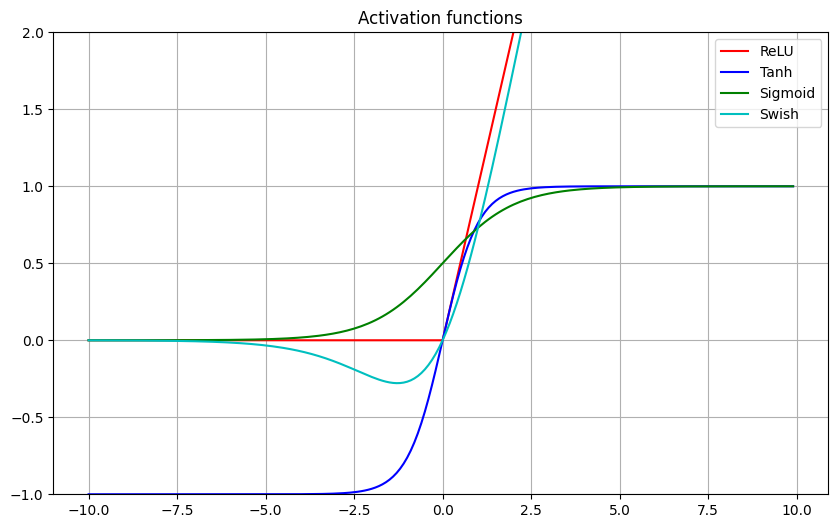

In [62]:
class ReLU():
    def forward(self, X):
        self.mask = X > 0
        return X * self.mask

class tanh():
    def forward(self, X):
        return torch.tanh(X)

class sigmoid():
    def forward(self, X):
        return 1 / (1 + torch.exp(-X))

class swish():
    def forward(self, X):
        return X * sigmoid().forward(X)

domain = torch.arange(-10, 10, 0.1)

plt.figure(figsize=(10,6))
plt.title("Activation functions")
plt.plot(domain, ReLU().forward(domain), 'r-', label = "ReLU")
plt.plot(domain, tanh().forward(domain), 'b-', label = "Tanh")
plt.plot(domain, sigmoid().forward(domain), 'g-', label = "Sigmoid")
plt.plot(domain, swish().forward(domain), 'c-', label = "Swish")
plt.ylim(-1,2)
plt.legend()
plt.grid()


### get_batches

Information must be fed to the neural networks in batches. That is, instead of passing one image at a time or all the images at once, we will define a batching fuction that will split the data in a given batch_size feeding just that amount of images at onece. 

If the batch_size is too small, the neural network may overfit to the samples in each batch, leading to poor generalization. On the other hand, a very large batch_size can make training less effective by smoothing out important variations in the data, which can make optimization more difficult. The goal is to find a balance between the two. A “sweet spot” that allows the model to learn efficiently while still generalizing wel

In [63]:
def get_batches(X, y, batch_size = 64, shuffle = True):
    indices = np.arange(X.shape[0])

    if shuffle: # así podemos apagar y encender el shuffle con la llamada a la función
        np.random.shuffle(indices)

    for i in range(0, X.shape[0], batch_size): # loop over dataset in chunks
        batch_idx = indices[i:i+batch_size]
        yield X[batch_idx], y[batch_idx]

In [64]:
i = 0
for x_batch, y_batch in get_batches(images, labels, batch_size = 64, shuffle = True):
    print(x_batch.shape)
    break

print("\nNumber of batches: %i\n" %round(60000/64))

torch.Size([64, 784])

Number of batches: 938



### train_test_split

Given a dataset it is essential to split the data. Validating the neural network over the training dataset is an unrepresentative indicator of the accuracy of the net, since it is being validated over the data it's been trained on.

As noted at the beginning of this project, PyTorch datasets come with a train=bool argument that loads a training dataset and a test dataset, so we are losing some data since we have only used the train = True dataset. Still, we are learning how to deal with data and it's interesting to note this.

In [65]:
def train_test_split(data, labels, test_ratio = 0.3, shuffle=True):
    number_of_samples = data.shape[0]
    indices = np.arange(number_of_samples)
    
    if shuffle: # if shuffle = False the function doesnt work. PEAK designing imo
        np.random.shuffle(indices)
        X = data[indices]
        y = labels[indices]

    test_size = round(number_of_samples * test_ratio)
 
    #Split
    X_train = X[:-test_size] # Desde 0 hasta -test_size
    y_train = y[:-test_size] 
    X_test = X[-test_size:] # Desde -test_size hasta el final
    y_test = y[-test_size:]
    return X_train, y_train, X_test, y_test

### Neural Network

We will now assemble everything we have done to produce a neural network. It has to forward the whole dataset in batches (forward) and optimize its parameters (backprop) in order to increase its performance, that is, in order to reduce the cross-entropy of our predicted distributions for each batch.

In [66]:
import torch
import numpy as np
from torchvision.transforms import ToTensor
from torchvision import datasets

mnist_data = datasets.MNIST(
    root = './data_MNIST',
    train = True,
    download = True,
    transform = ToTensor()
)

images = mnist_data.data
labels = mnist_data.targets

images = images.reshape(images.shape[0], 28*28) / 255
 
# HYPERPARAMETERS
num_epochs = 90
batch_size = 64
input_dim = 784
batch_dim = 64
hidden_dim = 128
output_dim = 10

# DATA

X_train, y_train, X_test, y_test = train_test_split(
    images, labels, test_ratio = 0.3, shuffle = True
)

# X TIENE DIMENSIONES (64, 784). CADA FILA ES UNA IMAGEN Y LO HAGO ASI PORQUE ES MAS COMODO

W1 = torch.randn(hidden_dim, input_dim) * 0.01 
W2 = torch.randn(output_dim, hidden_dim) * 0.01 
b1 = torch.randn(1, hidden_dim) * 0.01 
b2 = torch.randn(1, output_dim) * 0.01 

def forward(X):
    global Z1, A1
    Z1 = X @ W1.T + b1 # Python broadcast
    A1 = torch.tanh(Z1)
    Z2 = A1 @ W2.T + b2
    y_pred = torch.softmax(Z2, dim = 1) # torch.softmax
    return y_pred

def loss_function(y_pred, y_true):
    batch_size = y_true.shape[0]
    log_probs = torch.log(y_pred + 1e-9)
    loss = -torch.sum(log_probs[torch.arange(batch_size), y_true]) / batch_size
    return loss

def backprop(X, y_pred, y_true):
    lr = 0.01
    global W2, b2, W1, b1
    batch_size = y_true.shape[0]

    delta2 = y_pred.clone()
    delta2[torch.arange(batch_size), y_true] -=1 # dimensión (64,10)

    grad_loss_W2 = delta2.T @ A1 / batch_size
    grad_loss_b2 = torch.sum(delta2, dim=0, keepdim=True) / batch_size # dimensión (1,10)
    
    delta1 = (delta2 @ W2) * (1-A1**2) #dimensión (64,128)

    grad_loss_W1 = delta1.T @ X / batch_size
    grad_loss_b1 = torch.sum(delta1, dim=0, keepdim=True) / batch_size # dimensión (1,128)

    W2 -= lr * grad_loss_W2
    b2 -= lr * grad_loss_b2
    W1 -= lr * grad_loss_W1
    b1 -= lr * grad_loss_b1

printed = False

num_test_batches = int(X_test.shape[0]/batch_size)

for epoch in range(1, num_epochs+1, 1):
    total_loss = 0
    for X_train_batch, y_train_batch in get_batches(X_train, y_train, batch_size):
        y_pred = forward(X_train_batch)
        backprop(X_train_batch, y_pred, y_train_batch)

        if not printed:
            print(f"W1: {W1.shape}, \nW2: {W2.shape}, \nX : {X_train_batch.shape}, \nA1: {A1.shape}, \nA2: {y_pred.shape}, \nb1: {b1.shape}, \nb2: {b2.shape}\n")
            printed = True
            
    for X_test_batch, y_test_batch in get_batches(X_test, y_test, batch_size):
        test_pred = forward(X_test_batch)
        test_loss = loss_function(test_pred, y_test_batch)
        total_loss += test_loss.item()
    if epoch%10 == 0:
        print(f"Epoch {epoch}, Average cross-entropy of all test batches: {(total_loss/num_test_batches):.4f}")

W1: torch.Size([128, 784]), 
W2: torch.Size([10, 128]), 
X : torch.Size([64, 784]), 
A1: torch.Size([64, 128]), 
A2: torch.Size([64, 10]), 
b1: torch.Size([1, 128]), 
b2: torch.Size([1, 10])

Epoch 10, Average cross-entropy of all test batches: 0.3189
Epoch 20, Average cross-entropy of all test batches: 0.2625
Epoch 30, Average cross-entropy of all test batches: 0.2266
Epoch 40, Average cross-entropy of all test batches: 0.2002
Epoch 50, Average cross-entropy of all test batches: 0.1776
Epoch 60, Average cross-entropy of all test batches: 0.1613
Epoch 70, Average cross-entropy of all test batches: 0.1492
Epoch 80, Average cross-entropy of all test batches: 0.1385
Epoch 90, Average cross-entropy of all test batches: 0.1302


We will now print those indexes that the neural network failed to predict correctly. It would be interesting to check these handwritten digits.  

### Analysis of the results

In [68]:
images_trues = 0
images_false = 0
failed_indexes = []

def predict(X):
    y_pred = forward(X)
    return torch.argmax(y_pred, dim=1)

for i in range(images.shape[0]):
    y_pred = predict(images[i:i+1])
    if y_pred == labels[i].item():
        images_trues += 1
    else:
        images_false += 1
        failed_indexes.append(i)

print(f"\nAlgunos índices del dataset equivocados: \n{failed_indexes[:30]}\n")


Algunos índices del dataset equivocados: 
[48, 80, 132, 134, 148, 172, 180, 212, 224, 268, 278, 282, 418, 420, 444, 470, 494, 500, 547, 635, 670, 720, 778, 788, 846, 850, 854, 892, 902, 966]




Actual number: 2

Predicted value: tensor([2])



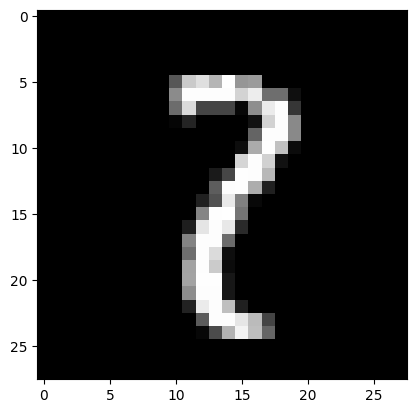

In [69]:
import matplotlib.pyplot as plt
index = 588

image = mnist_data.data[index]
label = mnist_data.targets[index]
prediction = predict(images[index:index+1]) #batch_size = 1

plt.imshow(image.squeeze(), cmap = 'grey')
print("\nActual number: %.i\n" %label)
print(f"Predicted value: {prediction}\n")

We will now check the accuracy of the neural network. To measure it correctly, we must evaluate the neural network only on the test dataset.  

In [70]:
y_pred = predict(X_test)
y_real = y_test

true_values = 0
false_values = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_real[i]:
        true_values += 1
    else:
        false_values += 1

print("\nAccuracy: %.5f\n" %(true_values/len(y_pred)))


Accuracy: 0.96267



So the neural network has over 90% accuracy. Each run should vary a little but the value should remain similar. Given that the MNIST dataset is very polished, it is normal to find such a high value. 

## class Neural_Network

Well now we have a full working analyzed neural network, but it is a bit loose... There are a couple of weights matrices, a couple of biases too, some functions defined and..., well, if you put it all together correctly and forward it, you'll get a probability distribution.

It would be nice to assemble all the pieces so we can work more comfortably with it. Change the activation functions, the number of layers, the amount of neurons per layer, so that is what we are going to do right now. 

For clarity purposes, we will rewrite below some of the main functions we used previously such as get_batches and train_test_split in case we need to redefine or change anything.

### ReLU()

Before we used tanh() as the activation function. We will try now to use another activation function, and so we will use the ReLU() which is one of the most common examples given its simplicity.

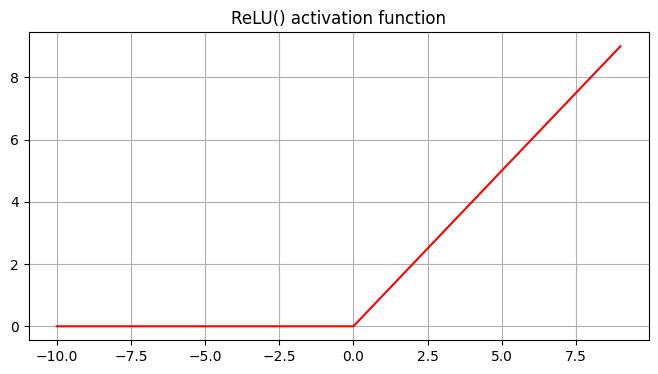

In [71]:
import matplotlib.pyplot as plt

domain = torch.arange(-10,10)

class ReLU():
    def forward(self, X):
        self.mask = X > 0
        return X * self.mask
    def backwards(self, grad_loss_output):
        return grad_loss_output * self.mask

relu_function = ReLU()

plt.figure(figsize=(8,4))
plt.plot(domain, relu_function.forward(domain), 'r-')
plt.title("ReLU() activation function")
plt.grid()

### get_batches

For clarity purpose we rewrite the get_batches function.

In [72]:
def get_batches(X, y, batch_size = 64, shuffle = True):
    indices = np.arange(X.shape[0])

    if shuffle: 
        np.random.shuffle(indices)

    for i in range(0, X.shape[0], batch_size): 
        batch_idx = indices[i:i+batch_size]
        yield X[batch_idx], y[batch_idx]

### train_test_split

For clarity purposes we rewrite the train_test_split functions.

In [73]:
def train_test_split(data, labels, test_ratio = 0.3, shuffle=True):
    number_of_samples = data.shape[0]
    indices = np.arange(number_of_samples)
    test_size = round(number_of_samples * test_ratio)
    
    if shuffle: #
        np.random.shuffle(indices)
        X = data[indices]
        y = labels[indices]

    X_train = X[:-test_size] 
    y_train = y[:-test_size] 
    X_test = X[-test_size:] 
    y_test = y[-test_size:]
    return X_train, y_train, X_test, y_test

### Dense

So, instead of writing the layers as simple matrices and biases, we will define a Dense class that contains all its necessary attributes and methods. This is much more clear and this way it's easier to rewrite anything if needed.

In [74]:
import torch

class layer():
    def __init__(self, output_size, input_size):
        self.W = torch.randn(output_size, input_size) * 0.01 # Instance attributes
        self.b = torch.randn(output_size,) * 0.01 # Python automatic broadcast
        
    def forward(self, X_input):
        self.X_input = X_input
        Z = X_input @ self.W.T + self.b
        return Z
        
    def backwards(self, grad_output):
        batch_size = self.X_input.shape[0]
        self.dW = grad_output.T @ self.X_input / batch_size # Instance attributes
        self.db = grad_output.sum(dim=0) / batch_size
        self.dX = grad_output @ self.W
        return self.dX

### class Neural Network

First example of what a simple fully working neural network class would look like. 

In [75]:
class Neural_Network():
    def __init__(self):
        self.layer1 = layer(128,784)
        self.layer2 = layer(10,128)
        self.relu = ReLU()
        
    def forward(self, X):
        Z1 = self.layer1.forward(X)
        A1 = self.relu.forward(Z1)
        Z2 = self.layer2.forward(A1)
        A2 = torch.softmax(Z2, dim=1)
        return A2
        
    def backwards(self, A2, y_true):
        # Hay que calcular el primer gradiente, el de la entropía cruzada
        batch_size = A2.shape[0]
        grad_CE = A2.clone()
        grad_CE[torch.arange(batch_size), y_true] -= 1

        CE = torch.mean(-torch.log(A2[torch.arange(batch_size), y_true] + 1e-9))

        grad = self.layer2.backwards(grad_CE)
        grad = self.relu.backwards(grad)
        grad = self.layer1.backwards(grad)
        return CE
        
    def update_parameters(self, lr = 0.01):
        self.layer2.W -= lr * self.layer2.dW
        self.layer2.b -= lr * self.layer2.db
        self.layer1.W -= lr * self.layer1.dW
        self.layer1.b -= lr * self.layer1.db

### Training loop

Average CE per epoch (nats): 2.11268
Average CE per epoch (nats): 0.30697
Average CE per epoch (nats): 0.23637
Average CE per epoch (nats): 0.19230
Average CE per epoch (nats): 0.16099
Average CE per epoch (nats): 0.13780
Average CE per epoch (nats): 0.11988
Average CE per epoch (nats): 0.10556
Average CE per epoch (nats): 0.09359
Average CE per epoch (nats): 0.08363


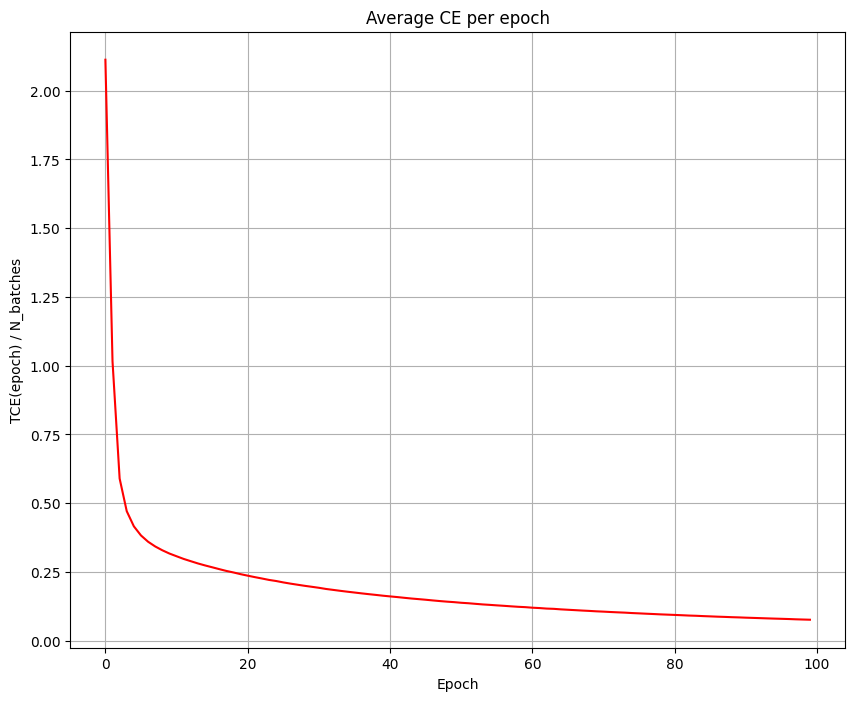

In [76]:
num_epochs = 100

x_train, y_train, x_test, y_test = train_test_split(images, labels)

# Initialize the model
model = Neural_Network()

batch_size = 64
train_samples = x_train.shape[0]
number_batches = int(train_samples / batch_size)
avg_CE_losses = []

for epoch in range(num_epochs):
    total_loss = 0
    for x_batch, y_batch in get_batches(x_train, y_train):
        output = model.forward(x_batch)
        batch_loss = backwards = model.backwards(output, y_batch)
        total_loss += batch_loss
        model.update_parameters()

    avg_CE_losses.append(total_loss/number_batches)
    
    if epoch%10 == 0:
        print("Average CE per epoch (nats): %.5f" %(total_loss/number_batches))

plt.figure(figsize=(10,8))
plt.title("Average CE per epoch")
plt.plot(np.arange(num_epochs), avg_CE_losses, 'r-')
plt.ylabel("TCE(epoch) / N_batches")
plt.xlabel("Epoch")
plt.grid()

In [77]:
for x_batch, y_batch in get_batches(x_train, y_train):
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([64, 784]) torch.Size([64])


In [78]:
index = 0
output = model.forward(x_test[index:index+1]) # test validation
actual_value = y_test[index:index+1]
digit = torch.argmax(output)

print(digit)
print(actual_value)

tensor(3)
tensor([3])


### Accuracy

In [79]:
y_pred = torch.argmax(model.forward(x_test), dim=1)
y_real = y_test

trues = (y_pred == y_real).int()
print(f"Accuracy: {torch.sum(trues)/y_real.shape[0]: .4f}")

Accuracy:  0.9672


It actually worked, most of the digits are correctly predicted by the neural network with just 10 epochs of training. So now we have a neural network as an actual Python object, and just like an int or a tensor as its own attributes and methods, so does our network.  

In [80]:
X_test.shape

torch.Size([18000, 784])

In [81]:
type(model)

__main__.Neural_Network

# Neural network analysis

So, we built a neural network class capable of classifying digits from the MNIST dataset. We relied only on NumPy along with torch.softmax(), and we used torch.tensor() objects to represent our matrices. This was mainly because the dataset was loaded through torchvision.datasets, which automatically converts each image into a tensor using torchvision.transforms.ToTensor(). In any case, the important point is that we didn’t rely on any high-level neural network libraries—the entire implementation was fairly “low-level.”

We could stop here, but I want to dive deeper into the performance of our network. Everything above will remain as the first part of this notebook. Next, we will reuse our neural network for additional experiments and compare its performance with high-level, professional models from well-known libraries such as PyTorch, and for that, we will first redefine our class.

## Towards a more flexible Neural_Network

You see, I don't like the way the neural network class is implemented. It was mainly a test to see how it would work but i want a more flexible class. Something to be instanced like we show below. I think it is a much more natural and intuitive way to build a neural network.

In addition, our neural network class only serves as a classification tool given its architecture and its probabilistic output, so that is too limitating, I want something more broad, more useful.

In [82]:
class NN():
    def __init__(self, layers_sizes, activations):
        self.layers = []
        self.activations = activations

        for i in range(len(layers_sizes)-1):
            input_size = layers_sizes[i]
            output_size = layers_sizes[i+1]
            self.layers.append(layer(output_size, input_size))

    def forward(self, X):
        out = X
        for layer, activation in zip(self.layers, self.activations):
            out = activation.forward(layer.forward(out))
        return out
        
    def backwards(self, y_pred, y_true):
        batch_size = y_pred.shape[0]

        grad = y_pred.clone()
        grad[torch.arange(batch_size), y_true] -= 1

        grad = self.layers[-1].backwards(grad)

        for layer, activation in reversed(list(zip(self.layers[1:-1], self.activations[:-1]))):
            grad = activation.backwards(layer.backwards(grad))

        grad = self.layers[0].backwards(grad)
            
        CE = -torch.log(y_pred[torch.arange(batch_size), y_true] + 1e-9).mean()
        return CE

    def update_parameters(self, lr=0.01):
        for layer in self.layers:
            layer.W -= lr * layer.dW
            layer.b -= lr * layer.db    

In [83]:
class softmax():
    def forward(self, X):
        return torch.softmax(X, dim = 1)

Average CE per epoch (nats): 2.08715
Average CE per epoch (nats): 0.30599
Average CE per epoch (nats): 0.26383
Average CE per epoch (nats): 0.24469
Average CE per epoch (nats): 0.23293
Average CE per epoch (nats): 0.22369
Average CE per epoch (nats): 0.21645
Average CE per epoch (nats): 0.21163
Average CE per epoch (nats): 0.20608
Average CE per epoch (nats): 0.20137


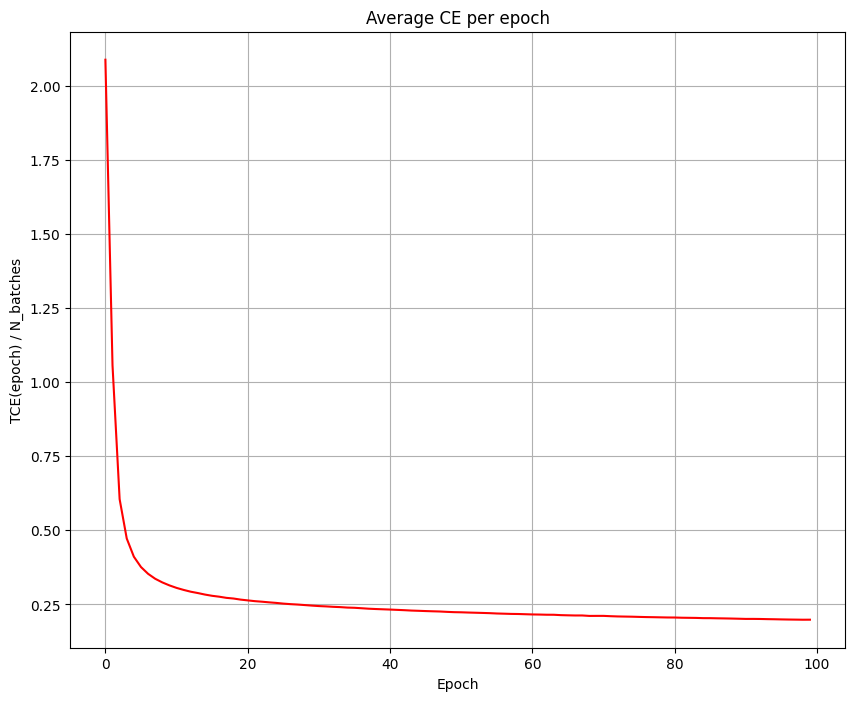

In [84]:
num_epochs = 100

x_train, y_train, x_test, y_test = train_test_split(images, labels)

# Initialize the new cooler model
model = NN(
    layers_sizes = [784, 256, 10],
    activations = [ReLU(), softmax()]
)

batch_size = 64
train_samples = x_train.shape[0]
number_batches = int(train_samples / batch_size)
avg_CE_losses = []

for epoch in range(num_epochs):
    total_loss = 0
    for x_batch, y_batch in get_batches(x_train, y_train):
        output = model.forward(x_batch)
        batch_loss = backwards = model.backwards(output, y_batch)
        total_loss += batch_loss
        model.update_parameters()

    avg_CE_losses.append(total_loss/number_batches)
    
    if epoch%10 == 0:
        print("Average CE per epoch (nats): %.5f" %(total_loss/number_batches))

plt.figure(figsize=(10,8))
plt.title("Average CE per epoch")
plt.plot(np.arange(num_epochs), avg_CE_losses, 'r-')
plt.ylabel("TCE(epoch) / N_batches")
plt.xlabel("Epoch")
plt.grid()

### Why are neural networks useful? A statistical point of view.

So the new model seems to work just fine. You see, neural networks are useful pretty much in every possible field you can imagine, see ChatGPT for example. Classifying images is cool but we can give the net many other uses. During my internship in Meteogalicia, a meteorological agency in Spain I used them to predict temperatures given many huge datasets of different meteorological variables, and it pretty much outperformed the traditional forecasting models, which rely heavily on initial conditions due to the chaotical nature of this phenomena.

Complex phenomena can often be understood through probabilistic and statistical analysis, which at least gives us some intuition about possible outcomes. For example, we cannot predict whether a specific person will play a musical instrument, because that depends on numerous complex factors like education, upbringing, and brain structure. It is impossible to determine that with a fully realistic model. However, we can make probabilistic statements: for instance, we might say that in a group of four people, there is a 90% chance that at least one will play some musical instrument. In this way, we have partially solved a complex problem using an approximate, simplified model.

Similarly, what determines whether someone will have a higher or lower GPA? There are many factors involved, but if we assume that grades are independent and identically distributed, we can approximate a random student’s GPA with a Gaussian distribution.

Physical equations face similar challenges. Every equation relies on some minimal assumptions. Take the Schwarzschild metric for a black hole: it assumes spherical symmetry and a static metric, which is not entirely realistic. Yet this solution provides a remarkably accurate description of all relativistic effects we have ever observed. Why make it more complicated? Every physical theory simplifies nature through a set of assumptions, and whether we can ever fully describe physical reality is ultimately a philosophical question.

Why all this? Because, just like our statistical models aim to capture the “big picture” from a multitude of small, complex factors, neural networks excel at uncovering hidden patterns in a dataset. Instead of building a complicated theoretical model to predict a phenomenon, we can rely on statistics.

For example, consider the orbit of a planet. Its path is determined by complex physical realities, such as the curvature of space-time caused by massive bodies. Instead of trying to model all these underlying processes in detail, we can train a neural network on many observed orbits. If done properly, the network can often predict the next position accurately. In other words, neural networks are like “statistics on steroids,” letting us make reliable predictions without fully understanding every underlying mechanism.


# Conclusion

To conclude, we’ve actually covered a lot in understanding how a neural network works. We started with a library that didn't work, which pushed us to explore PyTorch datasets. That’s when we discovered, tucked inside torchvision, the training data we needed (and only the training data) and along the way, we understood some basic concepts of information theory, like Shannon entropy, cross-entropy, and units of information, bits and nats.

From there, we dug into the core processes that a neural network must go through to actually function, and bit by bit, we built the basic blocks of our model. Finally, we achieved a fully working neural network, which we wrapped in a Python class so we could easily call it, tweak it, and experiment with it. It's not just about the network itself—it’s about the path we took, learning the theory, the code, and the hidden logic that makes it all work.

Now it’s time to use higher-level libraries to tackle more challenging problems. I actually tried to solve PINNs (Physics-Informed Neural Networks) using my homemade neural network, but computing the gradient of the loss function with respect to the network’s output turned out to be more tedious than educational. So, I’ll move on to the more powerful tools offered by the most popular neural network libraries.